Practice Model using Breast Cancer data set and the SDG Classifier

In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Import data set
df = pd.read_csv("Breast_Cancer_Diagnostic.csv")
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
#Reduce data set of X features to key set
df = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','diagnosis']]
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,M


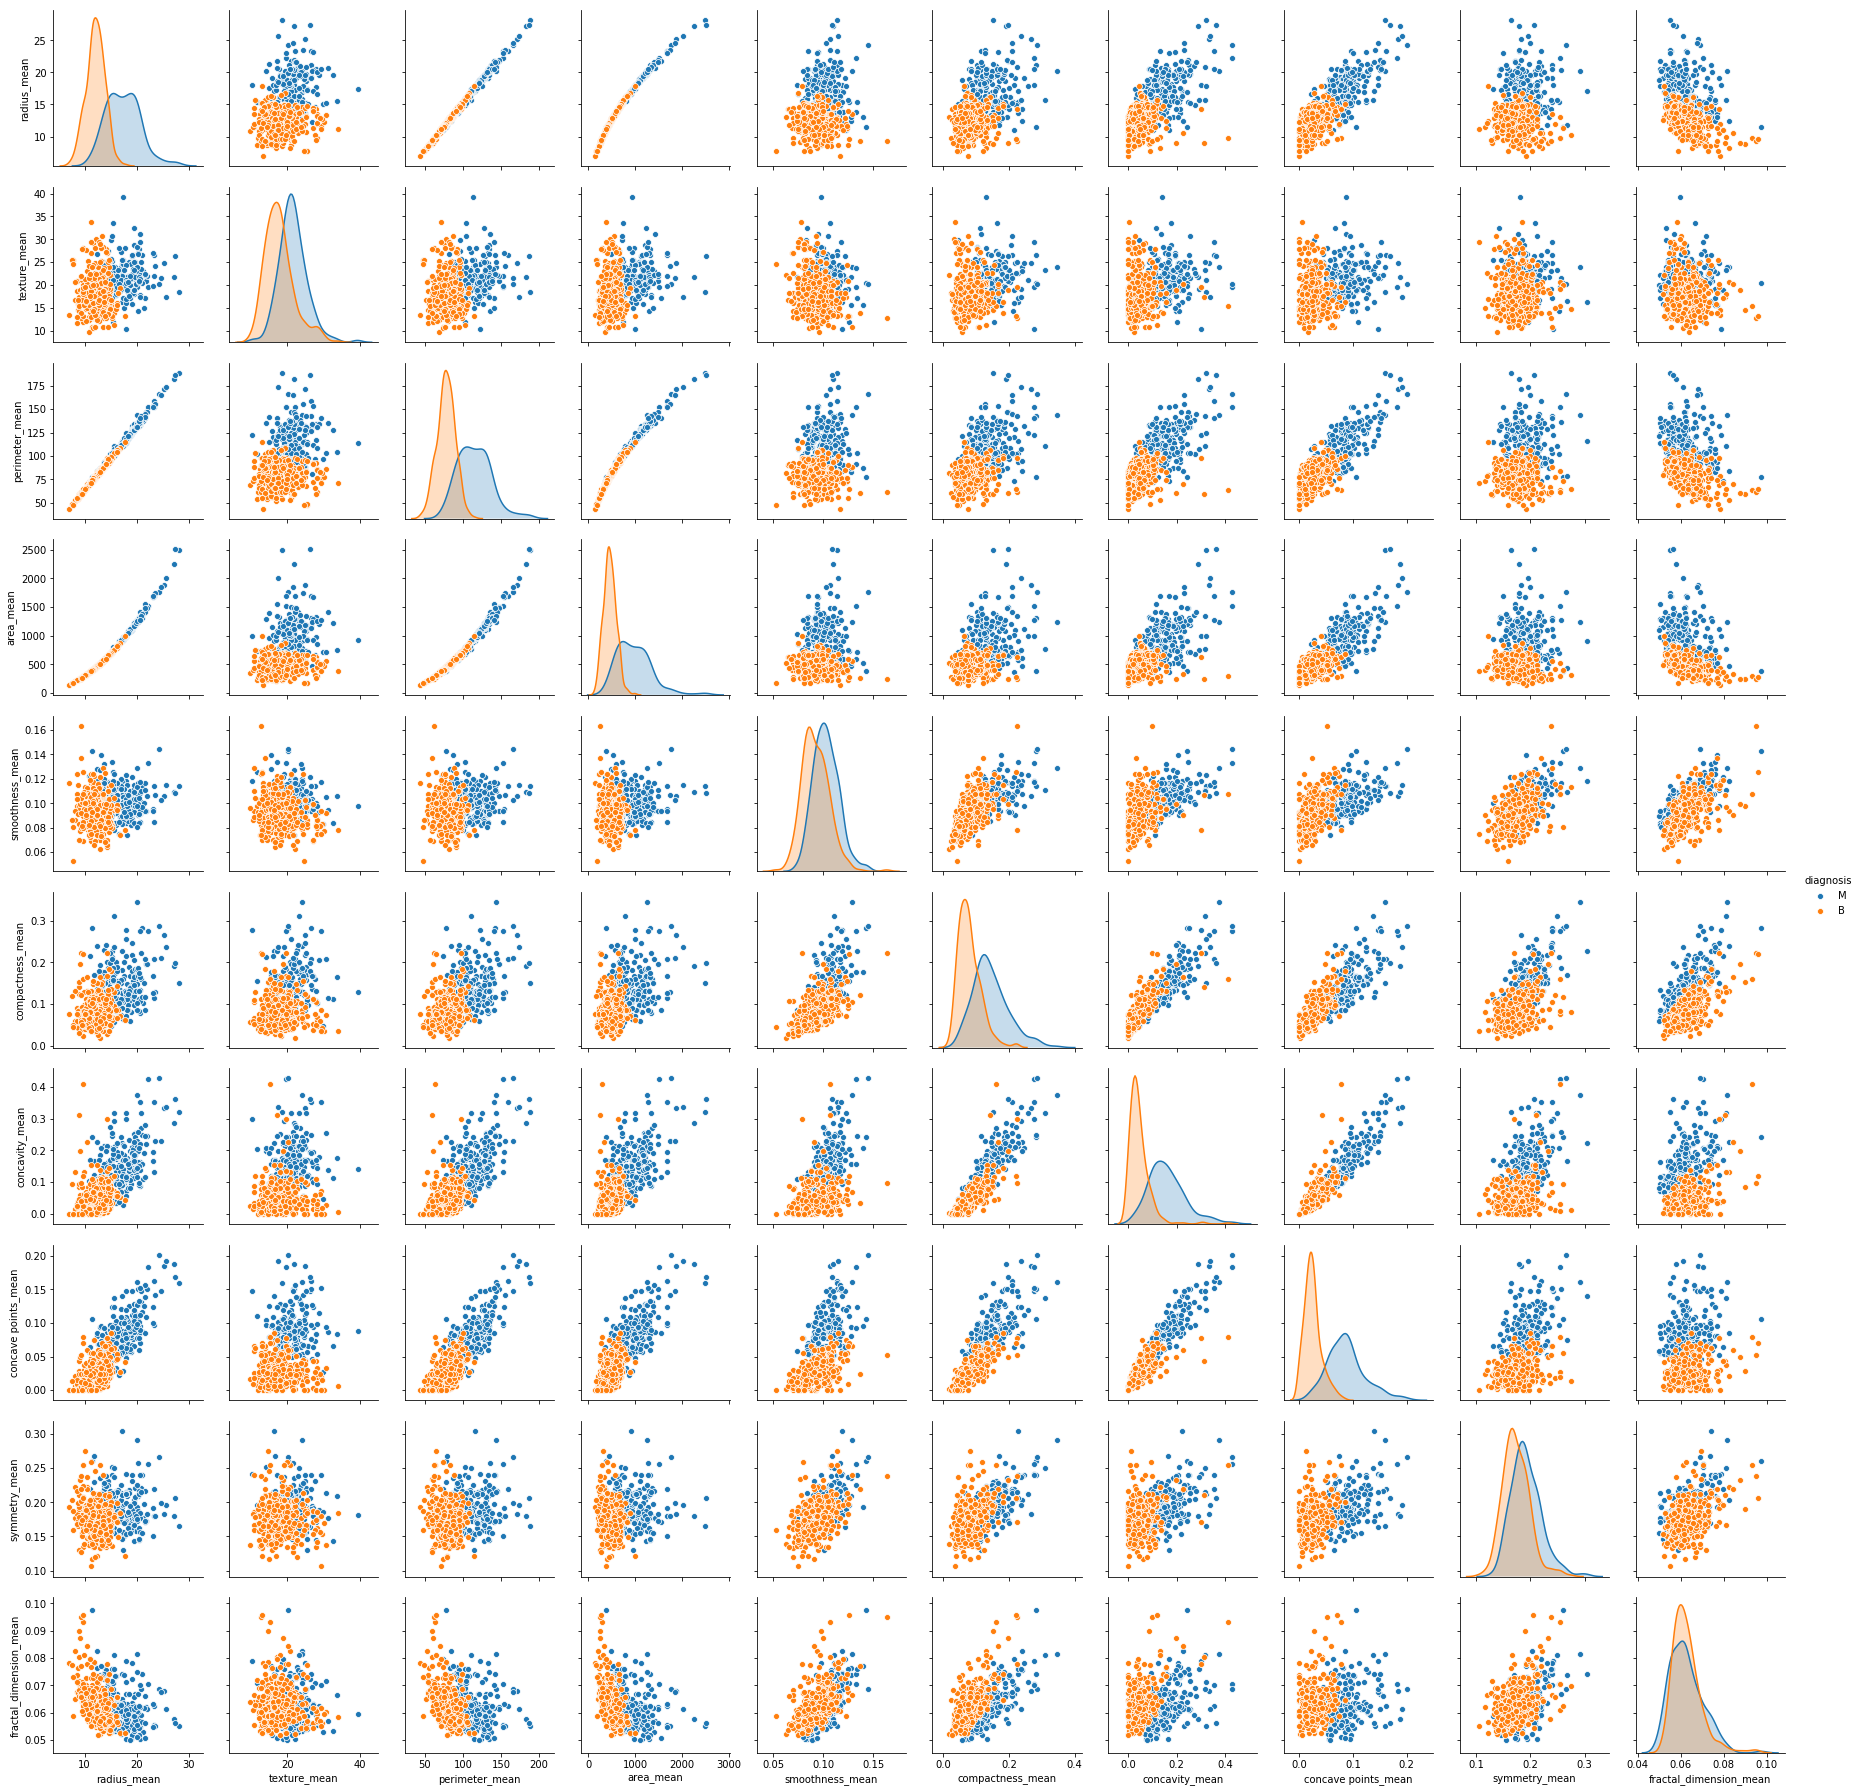

In [4]:
#Run a Pair Plot
sns.pairplot(df, hue = 'diagnosis')

In [5]:
#Import and scale date; Create X, and y 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [6]:
#Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [15]:
# import SGDCalssifier in linear_model
from sklearn.linear_model import SGDClassifier

In [63]:
#Creating instance 'SGD_model' using 'elasticnet' as penalty vs. default of I2
SGD_model = SGDClassifier(penalty='elasticnet',max_iter=1000, tol=0.001)

In [77]:
#Fit the model
SGD_model.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [78]:
#Check results with predictions
predictions = SGD_model.predict(X_test)

In [79]:
#Print Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[121   0]
 [ 29  38]]
              precision    recall  f1-score   support

           B       0.81      1.00      0.89       121
           M       1.00      0.57      0.72        67

   micro avg       0.85      0.85      0.85       188
   macro avg       0.90      0.78      0.81       188
weighted avg       0.88      0.85      0.83       188



In [80]:
#GRIDSEARCH
param_grid = {'max_iter':[100, 1000, 10000], 'tol': [.1, 0.01, 0.001, 0.0001]}

In [81]:
# We need to import GridSearchCV from model_selection
from sklearn.model_selection import GridSearchCV

In [82]:
#shift+tab for doc string
grid = GridSearchCV(SGDClassifier(), param_grid, verbose=2, refit='true')  #refit true by default

In [83]:
# Let's fit the data now
grid.fit(X_train, y_train)

C:\Users\djslb\.conda\envs\Robo_Jupiter\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] max_iter=100, tol=0.1 ...........................................
[CV] ............................ max_iter=100, tol=0.1, total=   0.0s
[CV] max_iter=100, tol=0.1 ...........................................
[CV] ............................ max_iter=100, tol=0.1, total=   0.0s
[CV] max_iter=100, tol=0.1 ...........................................
[CV] ............................ max_iter=100, tol=0.1, total=   0.0s
[CV] max_iter=100, tol=0.01 ..........................................
[CV] ........................... max_iter=100, tol=0.01, total=   0.0s
[CV] max_iter=100, tol=0.01 ..........................................
[CV] ........................... max_iter=100, tol=0.01, total=   0.0s
[CV] max_iter=100, tol=0.01 ..........................................
[CV] ........................... max_iter=100, tol=0.01, total=   0.0s
[CV] max_iter=100, tol=0.001 .........................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.2s finished
C:\Users\djslb\.conda\envs\Robo_Jupiter\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_iter': [100, 1000, 10000], 'tol': [0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit='true', return_train_score='warn',
       scoring=None, verbose=2)

In [84]:
#We can check the best parameters combination
print('The best parameters are %s with a score of %0.2f' % (grid.best_params_, grid.best_score_))

The best parameters are {'max_iter': 1000, 'tol': 0.01} with a score of 0.84


In [85]:
grid.best_params_

{'max_iter': 1000, 'tol': 0.01}

In [86]:
#Get the BEST Estimator
grid.best_estimator_

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.01,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [87]:
#Run best estimator on X_test
grid_predictions = grid.predict(X_test)

In [88]:
#Get the confusion matrix for the best estimator
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[118   3]
 [ 16  51]]
              precision    recall  f1-score   support

           B       0.88      0.98      0.93       121
           M       0.94      0.76      0.84        67

   micro avg       0.90      0.90      0.90       188
   macro avg       0.91      0.87      0.88       188
weighted avg       0.90      0.90      0.90       188

